In [52]:
# Importing libraries

import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # for standardization
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split

In [53]:
df = sns.load_dataset('titanic')   #loading titanic dataset from github directly
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [55]:
df3 = df2.fillna(df2.mean())   # filling nulls

# Converting matrix and vectors

In [56]:
X = df3.drop('survived', axis = 1)   
y= df3['survived']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


# Splitting to train test split

In [57]:
X_train,  X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [58]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (712, 3)
Shape of X_test:  (179, 3)
Shape of y_train:  (712,)
Shape of y_test:  (179,)


#  Applying Feature Scaling

In [59]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [60]:
sc.mean_

array([ 2.33005618, 29.53822538,  0.37921348])

In [61]:
sc.scale_   # standard deviation

array([ 0.82400502, 12.98541943,  0.79111317])

In [62]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.330056,29.538225,0.379213
std,0.824584,12.994548,0.791669
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [63]:
X_train_sc = sc.transform(X_train)
X_test_sc =sc.transform(X_test)

In [64]:
X_train_sc

array([[-1.61413602,  1.22920747, -0.47934164],
       [-0.40055118, -0.50350514, -0.47934164],
       [ 0.81303367,  0.18957991, -0.47934164],
       ...,
       [ 0.81303367,  0.88266495, -0.47934164],
       [-1.61413602, -1.19659018,  2.04874166],
       [-1.61413602, -0.65752403,  0.78470001]])

In [65]:
x_train_df = pd.DataFrame(X_train_sc, columns = ['pclass', 'age', 'parch'])
x_test_df = pd.DataFrame(X_train_sc, columns = ['pclass', 'age', 'parch'])

In [66]:
x_train_df.head()

,pclass,age,parch
0,-1.614136,1.229207,-0.479342
1,-0.400551,-0.503505,-0.479342
2,0.813034,0.189580,-0.479342
3,0.813034,-0.272477,-0.479342
4,0.813034,-1.812666,2.048742


In [67]:
x_test_df.head().round(2)

,pclass,age,parch
0,-1.61,1.23,-0.48
1,-0.40,-0.50,-0.48
2,0.81,0.19,-0.48
3,0.81,-0.27,-0.48
4,0.81,-1.81,2.05


#  Using MinMaxScaler (Normalization)

In [68]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [69]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc =mmc.transform(X_test)

In [70]:
X_train_mmc

array([[0.        , 0.56647399, 0.        ],
       [0.5       , 0.28373963, 0.        ],
       [1.        , 0.39683338, 0.        ],
       ...,
       [1.        , 0.50992712, 0.        ],
       [0.        , 0.17064589, 0.33333333],
       [0.        , 0.25860769, 0.16666667]])

In [71]:
x_train_mmc_df = pd.DataFrame(X_train_mmc, columns = ['pclass', 'age', 'parch'])
x_test_mmc_df = pd.DataFrame(X_train_mmc, columns = ['pclass', 'age', 'parch'])

In [72]:
x_train_mmc_df.head().round(2)

,pclass,age,parch
0,0.0,0.57,0.00
1,0.5,0.28,0.00
2,1.0,0.40,0.00
3,1.0,0.32,0.00
4,1.0,0.07,0.33


In [73]:
x_test_mmc_df.head().round(2)

,pclass,age,parch
0,0.0,0.57,0.00
1,0.5,0.28,0.00
2,1.0,0.40,0.00
3,1.0,0.32,0.00
4,1.0,0.07,0.33


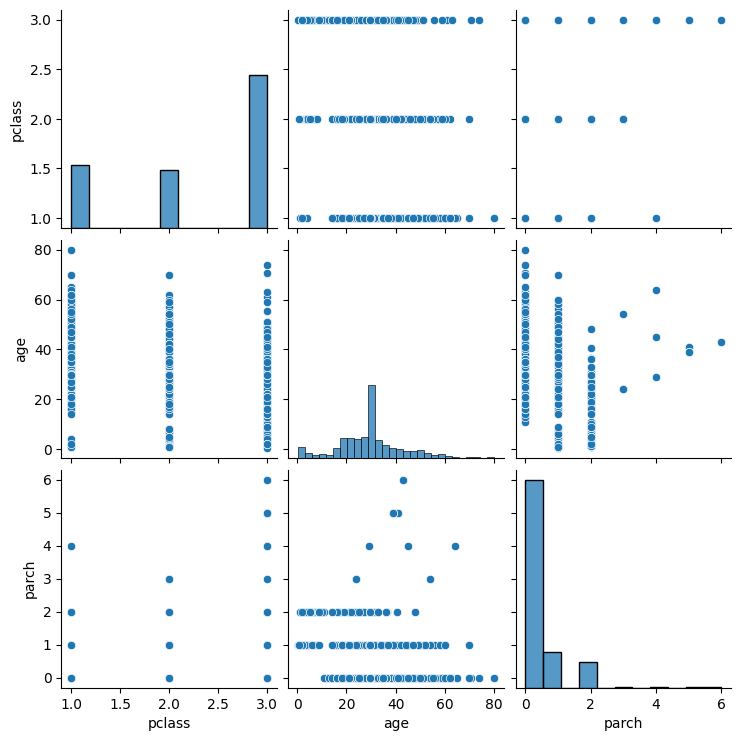

In [74]:
sns.pairplot(X_train)

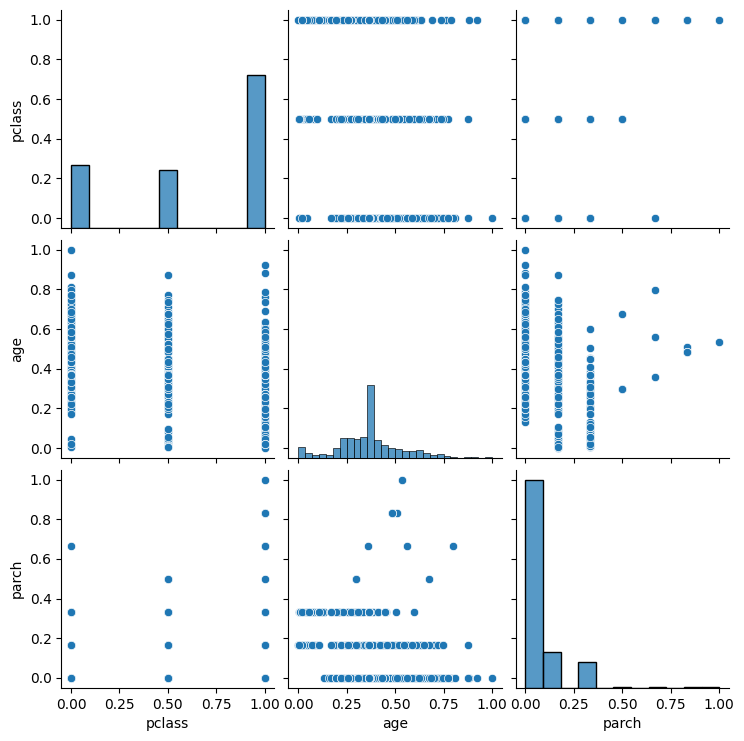

In [78]:
sns.pairplot(x_train_mmc_df)